In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
mort_data=pd.read_csv(Path('C:/Users/evere/Downloads/historicalweeklydata.csv'),header=6, index_col="Week", parse_dates=True)
mort_data.tail()

,FRM,points,FRM.1,points.1,ARM,points.2,margin,spread,Unnamed: 9
Week,,,,,,,,,
2020-12-03,2.71,0.7,2.26,0.6,2.86,0.3,2.75,-0.15,NaN
2020-12-10,2.71,0.7,2.26,0.6,2.79,0.3,2.75,-0.08,NaN
2020-12-17,2.67,0.7,2.21,0.6,2.79,0.3,2.75,-0.12,NaN
2020-12-24,2.66,0.7,2.19,0.5,2.79,0.2,2.75,-0.13,NaN
2020-12-31,2.67,0.7,2.17,0.7,2.71,0.4,2.75,-0.04,NaN


In [3]:
mort_data.drop(columns=["points", "points.1", "points.2", "spread", "Unnamed: 9"], inplace=True)
mort_data.tail()

,FRM,FRM.1,ARM,margin
Week,,,,
2020-12-03,2.71,2.26,2.86,2.75
2020-12-10,2.71,2.26,2.79,2.75
2020-12-17,2.67,2.21,2.79,2.75
2020-12-24,2.66,2.19,2.79,2.75
2020-12-31,2.67,2.17,2.71,2.75


In [4]:
mort_data.dropna(inplace=True)
mort_data

,FRM,FRM.1,ARM,margin
Week,,,,
2005-01-06,5.77,5.21,5.03,2.78
2005-01-13,5.74,5.19,5.05,2.79
2005-01-20,5.67,5.15,5.05,2.79
2005-01-27,5.66,5.14,5.02,2.79
2005-02-03,5.63,5.14,5.00,2.79
...,...,...,...,...
2020-12-03,2.71,2.26,2.86,2.75
2020-12-10,2.71,2.26,2.79,2.75
2020-12-17,2.67,2.21,2.79,2.75


In [5]:
new_mort_data=pd.read_csv(('C:/Users/evere/Downloads/historicalweeklydata21.csv'),skiprows=2, index_col="Week", parse_dates=True)
new_mort_data.head()

,FRM,points,FRM.1,points.1,ARM,points.2,margin,spread,Unnamed: 9
Week,,,,,,,,,
2021-01-07,2.65,0.7,2.16,0.6,2.75,0.3,2.75,-0.10,NaN
2021-01-14,2.79,0.7,2.23,0.7,3.12,0.4,2.75,-0.33,NaN
2021-01-21,2.77,0.7,2.21,0.6,2.80,0.4,2.75,-0.03,NaN
2021-01-28,2.73,0.7,2.20,0.6,2.80,0.3,2.75,-0.07,NaN
2021-02-04,2.73,0.7,2.21,0.6,2.78,0.3,2.75,-0.05,NaN


In [6]:
new_mort_data.drop(columns=["points", "points.1", "points.2", "spread", "Unnamed: 9"], inplace=True)
new_mort_data

,FRM,FRM.1,ARM,margin
Week,,,,
2021-01-07,2.65,2.16,2.75,2.75
2021-01-14,2.79,2.23,3.12,2.75
2021-01-21,2.77,2.21,2.80,2.75
2021-01-28,2.73,2.20,2.80,2.75
2021-02-04,2.73,2.21,2.78,2.75
2021-02-11,2.73,2.19,2.79,2.75
2021-02-18,2.81,2.21,2.77,2.75
2021-02-25,2.97,2.34,2.99,2.75
2021-03-04,3.02,2.34,2.73,2.75


In [7]:
new_mort_data.dtypes

FRM       float64
FRM.1     float64
ARM       float64
margin    float64
dtype: object

In [8]:
mort_data = mort_data.append(new_mort_data, sort=True)
mort_data

,ARM,FRM,FRM.1,margin
Week,,,,
2005-01-06,5.03,5.77,5.21,2.78
2005-01-13,5.05,5.74,5.19,2.79
2005-01-20,5.05,5.67,5.15,2.79
2005-01-27,5.02,5.66,5.14,2.79
2005-02-03,5.00,5.63,5.14,2.79
...,...,...,...,...
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN


In [9]:
mort_data.dropna(inplace=True)
mort_data

,ARM,FRM,FRM.1,margin
Week,,,,
2005-01-06,5.03,5.77,5.21,2.78
2005-01-13,5.05,5.74,5.19,2.79
2005-01-20,5.05,5.67,5.15,2.79
2005-01-27,5.02,5.66,5.14,2.79
2005-02-03,5.00,5.63,5.14,2.79
...,...,...,...,...
2021-07-01,2.54,2.98,2.26,2.75
2021-07-08,2.52,2.90,2.20,2.75
2021-07-15,2.47,2.88,2.22,2.75


In [10]:
mort_data.tail()

,ARM,FRM,FRM.1,margin
Week,,,,
2021-07-01,2.54,2.98,2.26,2.75
2021-07-08,2.52,2.90,2.20,2.75
2021-07-15,2.47,2.88,2.22,2.75
2021-07-22,2.49,2.78,2.12,2.75
2021-07-29,2.45,2.80,2.10,2.75


In [11]:
mort_data

,ARM,FRM,FRM.1,margin
Week,,,,
2005-01-06,5.03,5.77,5.21,2.78
2005-01-13,5.05,5.74,5.19,2.79
2005-01-20,5.05,5.67,5.15,2.79
2005-01-27,5.02,5.66,5.14,2.79
2005-02-03,5.00,5.63,5.14,2.79
...,...,...,...,...
2021-07-01,2.54,2.98,2.26,2.75
2021-07-08,2.52,2.90,2.20,2.75
2021-07-15,2.47,2.88,2.22,2.75


In [12]:
con_mort_data = mort_data.groupby(pd.Grouper(freq="M")).mean()

In [13]:
con_mort_data.reset_index(inplace=True)

In [14]:
con_mort_data["Week"] = con_mort_data["Week"].apply(lambda dt: dt.replace(day=1))

In [15]:
con_mort_data.set_index("Week", inplace=True)

In [16]:
con_mort_data

,ARM,FRM,FRM.1,margin
Week,,,,
2005-01-01,5.0375,5.7100,5.1725,2.7875
2005-02-01,5.0225,5.6275,5.1500,2.7900
2005-03-01,5.2960,5.9280,5.4640,2.7840
2005-04-01,5.2650,5.8550,5.4075,2.7850
2005-05-01,5.1275,5.7200,5.2800,2.7900
...,...,...,...,...
2021-03-01,2.7825,3.0825,2.3925,2.7500
2021-04-01,2.8060,3.0600,2.3640,2.7500
2021-05-01,2.6175,2.9625,2.2800,2.7500


In [17]:
df = pd.read_csv(Path('C:/Users/evere/Downloads/sold_cust.csv'),header=4, index_col="Period", parse_dates=True)
df.head()

,Implicit US,North,Mid-West,South,West,for sale,Supply2
Period,,,,,,,
1997-01-01,88.2,76.4,75.4,93.4,93.1,(NA),108.7
1997-02-01,103.4,107.0,97.1,103.4,107.6,(NA),95.6
1997-03-01,117.0,102.3,124.5,116.4,118.2,(NA),84.7
1997-04-01,112.9,109.1,123.3,110.2,114.4,(NA),87.0
1997-05-01,112.1,110.7,117.5,108.9,112.0,(NA),88.1


In [18]:
homes_sold = df[['Implicit US']]
homes_sold

,Implicit US
Period,
1997-01-01,88.2
1997-02-01,103.4
1997-03-01,117.0
1997-04-01,112.9
1997-05-01,112.1
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [19]:
homes_sold.dropna(inplace=True)

<ipython-input-19-d381409a1c86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes_sold.dropna(inplace=True)


In [20]:
homes_sold

,Implicit US
Period,
1997-01-01,88.2
1997-02-01,103.4
1997-03-01,117.0
1997-04-01,112.9
1997-05-01,112.1
...,...
2021-03-01,114.1
2021-04-01,111.6
2021-05-01,107.7


In [21]:
homes_sold = homes_sold.loc[homes_sold.index > "2004-12-01"]

In [22]:
homes_sold

,Implicit US
Period,
2005-01-01,91.8
2005-02-01,99.2
2005-03-01,114.8
2005-04-01,110.5
2005-05-01,112.0
...,...
2021-03-01,114.1
2021-04-01,111.6
2021-05-01,107.7


In [23]:
combined_df = pd.concat(([con_mort_data, homes_sold["Implicit US"]]), axis="columns", ignore_index=True, join="outer")
combined_df

,0,1,2,3,4
2005-01-01,5.0375,5.7100,5.1725,2.7875,91.8
2005-02-01,5.0225,5.6275,5.1500,2.7900,99.2
2005-03-01,5.2960,5.9280,5.4640,2.7840,114.8
2005-04-01,5.2650,5.8550,5.4075,2.7850,110.5
2005-05-01,5.1275,5.7200,5.2800,2.7900,112.0
...,...,...,...,...,...
2021-03-01,2.7825,3.0825,2.3925,2.7500,114.1
2021-04-01,2.8060,3.0600,2.3640,2.7500,111.6
2021-05-01,2.6175,2.9625,2.2800,2.7500,107.7
2021-06-01,2.5600,2.9750,2.2700,2.7500,106.5


In [24]:
df1= pd.read_csv(Path('C:/Users/evere/project-2/Project-2/Housing_Market_Prediction/US Median Home Price  - Sheet1 (1).csv'), index_col="Period", parse_dates = True)

df1

,Median Home Price,Inflation Adjusted Price
Period,,
2004-05-01,181893.38,"$254,782.51"
2004-06-01,184363.48,"$257,425.65"
2004-07-01,185882.06,"$259,957.14"
2004-08-01,187121.91,"$261,552.98"
2004-09-01,188169.54,"$262,463.31"
...,...,...
2021-03-01,314769.26,"$314,769.26"
2021-04-01,340600.00,$0.00
2021-05-01,350400.00,$0.00


In [25]:
df2 = df1.iloc[8:207]
df3 = df2.drop(columns='Inflation Adjusted Price')
df3

,Median Home Price
Period,
2005-01-01,191629.60
2005-02-01,193321.19
2005-03-01,196060.40
2005-04-01,198559.33
2005-05-01,201173.60
...,...
2021-03-01,314769.26
2021-04-01,340600.00
2021-05-01,350400.00


In [26]:
ml_df = pd.concat(([con_mort_data, homes_sold["Implicit US"], df3["Median Home Price"]]), axis="columns", ignore_index=True, join="outer")
ml_df

,0,1,2,3,4,5
2005-01-01,5.0375,5.7100,5.1725,2.7875,91.8,191629.60
2005-02-01,5.0225,5.6275,5.1500,2.7900,99.2,193321.19
2005-03-01,5.2960,5.9280,5.4640,2.7840,114.8,196060.40
2005-04-01,5.2650,5.8550,5.4075,2.7850,110.5,198559.33
2005-05-01,5.1275,5.7200,5.2800,2.7900,112.0,201173.60
...,...,...,...,...,...,...
2021-03-01,2.7825,3.0825,2.3925,2.7500,114.1,314769.26
2021-04-01,2.8060,3.0600,2.3640,2.7500,111.6,340600.00
2021-05-01,2.6175,2.9625,2.2800,2.7500,107.7,350400.00
2021-06-01,2.5600,2.9750,2.2700,2.7500,106.5,363300.00


In [27]:
ml_df.reset_index(inplace=True)

In [28]:
ml_df.rename(columns={})

,index,0,1,2,3,4,5
0,2005-01-01,5.0375,5.7100,5.1725,2.7875,91.8,191629.60
1,2005-02-01,5.0225,5.6275,5.1500,2.7900,99.2,193321.19
2,2005-03-01,5.2960,5.9280,5.4640,2.7840,114.8,196060.40
3,2005-04-01,5.2650,5.8550,5.4075,2.7850,110.5,198559.33
4,2005-05-01,5.1275,5.7200,5.2800,2.7900,112.0,201173.60
...,...,...,...,...,...,...,...
194,2021-03-01,2.7825,3.0825,2.3925,2.7500,114.1,314769.26
195,2021-04-01,2.8060,3.0600,2.3640,2.7500,111.6,340600.00
196,2021-05-01,2.6175,2.9625,2.2800,2.7500,107.7,350400.00
197,2021-06-01,2.5600,2.9750,2.2700,2.7500,106.5,363300.00


In [29]:
ml_df['index'] = ml_df['index'].map(datetime.toordinal)
X = ml_df[['index', 0, 4]]
Y = ml_df[5]
Y

0      191629.60
1      193321.19
2      196060.40
3      198559.33
4      201173.60
         ...    
194    314769.26
195    340600.00
196    350400.00
197    363300.00
198    374400.00
Name: 5, Length: 199, dtype: float64

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.predict(X)
print(lin_reg.score(X, Y))

0.7628558957798759


In [31]:
print('Intercept: \n', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)
print(lin_reg.predict(X))
print('-' * 65)
print(pd.DataFrame(zip(X.columns, lin_reg.coef_),
            columns=['features', 'estimatedCofficients']))

Intercept: 
 -21249349.20362653
Coefficients: 
 [   29.04152597 25724.10997042   218.39091525]
[157142.09753636 159272.61596483 170528.22104695 169691.98000742
 167353.74703855 165812.50697415 169059.98904396 173878.26202318
 172017.05470111 179250.18969937 183971.67651093 184407.08343976
 186153.21123783 192961.36864299 199059.02565653 202336.0772913
 206146.05752704 207955.25077653 209444.25231232 205567.88921936
 202206.38544312 203248.72295556 200389.36736274 199389.05213183
 203047.32616308 205487.21287186 207456.15023516 207941.75882082
 210563.45107764 219416.9014211  219515.32999933 220245.05361022
 215821.8833468  213911.98321089 208058.44682531 207780.82067287
 197945.44110331 197752.90649974 207499.99058618 209385.5641071
 213393.30316621 216435.36773397 220665.60892242 223305.74372786
 218901.20649817 225314.52695684 220060.26421579 212461.97879696
 205313.71264134 203672.97094036 204294.070549   202857.49978696
 201430.43584006 207493.65013405 202992.96998685 199043.696699

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                        random_state=0)

In [33]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
Y_train = linreg.predict(X_train)

In [34]:
rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
r2 = metrics.r2_score(Y_test, Y_pred)

In [35]:
print('RMSE:', rmse)
print('R square:', r2)

RMSE: 17437.562554495493
R square: 0.7509201652309175


In [36]:
print('-' * 65)
print(linreg.score(X, Y))

-----------------------------------------------------------------
0.7613479143579185


In [37]:
print('-' * 65)
print(linreg.score(X, Y))

-----------------------------------------------------------------
0.7613479143579185


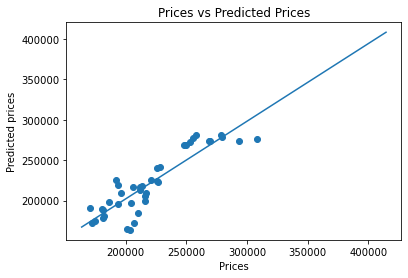

In [38]:
plt.scatter(Y_test, Y_pred)
axes = plt.gca()
m, b = np.polyfit(Y_test, Y_pred, 1)
X_plot = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1]+100000, 100)
plt.plot(X_plot, m * X_plot + b, '-')
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted Prices')
plt.show()

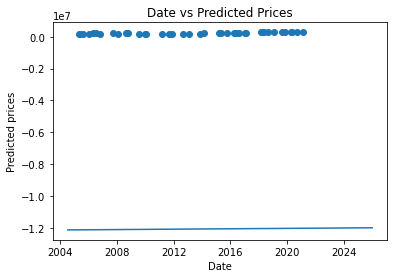

In [39]:
X_test_date = X_test['index'].map(datetime.fromordinal)
ml_df_plot2 = pd.DataFrame({'index': X_test['index'], 'Predicted': Y_pred})
plt.scatter(X_test_date, Y_pred)
axes = plt.gca()
m1, b1 = np.polyfit(X_test['index'], Y_pred, 1)
X_plot1 = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1]+1500, 100)
plt.plot(X_plot1, m1 * X_plot1 + b1, '-')
plt.xlabel('Date')
plt.ylabel('Predicted prices')
plt.title('Date vs Predicted Prices')
plt.show()
df_plot3 = pd.DataFrame({'Interest Rate': X_test[0],
                         'Predicted': Y_pred})

     Interest Rate      Predicted
18          6.3575  208789.044363
169         3.8675  281280.887292
106         2.9650  195837.806307
92          2.7350  178614.905334
176         3.3825  273397.914583
183         3.3120  280790.967583
5           5.0640  163780.071578
139         2.7450  222673.481727
12          5.7600  184614.770613
160         3.7900  272795.814321
61          4.1850  189229.460627
124         2.8925  216606.246909
164         3.9375  276911.881590
145         3.1950  241522.795750
80          2.9900  174596.546904
7           5.3350  172074.157396
33          6.0925  213431.516394
129         2.8900  217559.754247
37          5.3000  196854.184780
74          3.6680  191077.078470
159         3.6600  268868.489731
144         3.2425  239866.816503
45          6.0920  225324.035067
158         3.6520  268967.945021
60          4.3200  188832.426547
122         2.9650  217296.628908
178         3.4125  273798.798420
184         3.1625  278183.264400
97          2.

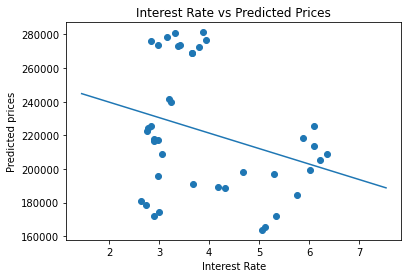

In [40]:
print(df_plot3)
plt.scatter(X_test[0], Y_pred)
axes = plt.gca()
m2, b2 = np.polyfit(X_test[0], Y_pred, 1)
X_plot2 = np.linspace(axes.get_xlim()[0]-1, axes.get_xlim()[1]+1, 100)
plt.plot(X_plot2, m2 * X_plot2 + b2, '-')
plt.xlabel('Interest Rate')
plt.ylabel('Predicted prices')
plt.title('Interest Rate vs Predicted Prices')
plt.show()

In [42]:
df_plot3 = pd.DataFrame({'homes_sold': X_test[4],
                             'Predicted': Y_pred})

     homes_sold      Predicted
18        103.2  208789.044363
169       101.3  281280.887292
106        86.1  195837.806307
92         93.5  178614.905334
176        95.2  273397.914583
183       107.2  280790.967583
5         108.3  163780.071578
139        96.0  222673.481727
12         91.0  184614.770613
160       109.4  272795.814321
61         96.4  189229.460627
124       112.4  216606.246909
164        94.5  276911.881590
145       101.8  241522.795750
80         94.7  174596.546904
7         105.2  172074.157396
33         94.1  213431.516394
129        97.1  217559.754247
37         97.1  196854.184780
74        112.0  191077.078470
159       111.2  268868.489731
144        93.4  239866.816503
45         97.7  225324.035067
158       116.5  268967.945021
60         83.5  188832.426547
122       115.0  217296.628908
178        85.7  273798.798420
184       109.1  278183.264400
97         96.6  181185.184514
44         97.0  218701.381941
16        112.7  205473.333905
55      

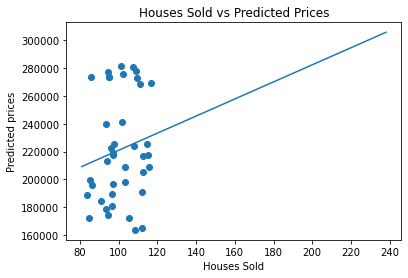

In [46]:
print(df_plot3)
plt.scatter(X_test[4], Y_pred)
axes = plt.gca()
m3, b3 = np.polyfit(X_test[4], Y_pred, 1)
X_plot3 = np.linspace(axes.get_xlim()[0]-1, axes.get_xlim()[1]+120, 20)
plt.plot(X_plot3, m3 * X_plot3 + b3, '-')
plt.xlabel('Houses Sold')
plt.ylabel('Predicted prices')
plt.title('Houses Sold vs Predicted Prices')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
#ml_df['index'] = ml_df['index'].apply(lambda x: x.toordinal())
#ml_df['index'] = ml_df['index'].map(dt.datetime.toordinal)
X = ml_df[['index',0 , 5]]
Y = ml_df[5]

In [ ]:
# Fit a Logistic regression model using random undersampled data
model = LogisticRegression(solver='lbfgs',) 
# Use the SMOTEENN technique to perform combination sampling on the data
# Count the resampled classes
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)
Counter(Y_resampled)


In [ ]:
# Fit a Logistic regression model using random undersampled data

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)


In [ ]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    Y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        .append(target)
    return np.array(X), np.array(Y).reshape(-1, 1)


In [ ]:
#Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
# Use 70% of the data for training and the remainder for testin
training= int(.7*len(X)) #data requires int in order to be sliced
test= (len(X)-training)
X_train=X[:training-1] #within the X array, this takes everything before training data -1. so like 1-.7=.3
X_test=X[training:]#within X array, it takes everything that was not already taken
ytrain=Y[:training-1]
ytest=Y[training:]


In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(ytrain)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
ytrain = y_train_scaler.transform(ytrain)

# Fit the scaler for the testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(ytest)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
ytest = y_test_scaler.transform(ytest)


In [ ]:
plt.scatter(con_mort_data['ARM'], df3['Median Home Price'])
plt.title('Adjustable Rate Mortgage Vs Price', fontsize=14)
plt.xlabel('Adjustable Rate Mortgage', fontsize=14)
plt.ylabel('Median Home Price', fontsize=14)
plt.show()

In [ ]:
plt.scatter(ml_df['4'], ml_df['5'], color='red')
plt.title('Houses sold Vs Price', fontsize=14)
plt.xlabel('Houses sold', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

In [ ]:
plt.scatter((homes_sold.index()), color='red')
plt.title('Date Vs Homes Sold', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Homes Sold', fontsize=14)
plt.show()

In [ ]:
y = ml_df['Future_Prices'] 

In [ ]:
x = ml_df['5'].to_frame()